# Tensor - Basic

In [1]:
import torch
print("version is : ", torch.__version__)
x = [[1,2], [3,4]]
x_t = torch.tensor(x)
print("tensor is : ", x_t)

version is :  2.5.1
tensor is :  tensor([[1, 2],
        [3, 4]])


In [2]:
import numpy as np
x_n = np.array(x)
n_t = torch.tensor( x_n )
print("numpy to tensor : ", n_t)

numpy to tensor :  tensor([[1, 2],
        [3, 4]], dtype=torch.int32)


In [3]:
t_n = n_t.numpy()
print("tensor to numpy : ", type(t_n))

tensor to numpy :  <class 'numpy.ndarray'>


In [4]:
rand_t = torch.rand(2,3)
rand_t

tensor([[0.2126, 0.3084, 0.1082],
        [0.6183, 0.3778, 0.6002]])

In [5]:
t_zero = torch.zeros(3,3)
t_zero

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [6]:
t_one = torch.ones(3,3)
t_one

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [7]:
xt = torch.tensor( [[1,2,3,],[4,5,6]] )
xt

tensor([[1, 2, 3],
        [4, 5, 6]])

In [8]:
xt[0]

tensor([1, 2, 3])

In [9]:
xt[0][1]

tensor(2)

In [10]:
xt[:,1]

tensor([2, 5])

In [11]:
xt[:,-1]

tensor([3, 6])

In [12]:
xt[1,1] = 100
xt

tensor([[  1,   2,   3],
        [  4, 100,   6]])

In [13]:
xt[1] = 22
xt

tensor([[ 1,  2,  3],
        [22, 22, 22]])

In [14]:
x1 = torch.tensor([[1,2,3],[4,5,6]])
x2 = torch.tensor([[7,8,9],[10,11,12]])

In [15]:
con0 = torch.cat([x1,x2], dim=0)
con0

tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]])

In [16]:
con1 = torch.cat([x1,x2], dim=1)
con1

tensor([[ 1,  2,  3,  7,  8,  9],
        [ 4,  5,  6, 10, 11, 12]])

In [17]:
x1

tensor([[1, 2, 3],
        [4, 5, 6]])

In [18]:
x1.reshape(3,2)

tensor([[1, 2],
        [3, 4],
        [5, 6]])

In [19]:
x1

tensor([[1, 2, 3],
        [4, 5, 6]])

In [20]:
x1.T

tensor([[1, 4],
        [2, 5],
        [3, 6]])

In [21]:
x3 = x1*x2
x3

tensor([[ 7, 16, 27],
        [40, 55, 72]])

In [22]:
x3 = x1.mul(x2)
x3

tensor([[ 7, 16, 27],
        [40, 55, 72]])

In [23]:
x3 = x1.matmul(x2.T)
x3

tensor([[ 50,  68],
        [122, 167]])

# Data - basic

In [24]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [25]:
train_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=transforms.ToTensor(),
)
test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=transforms.ToTensor(),
)


In [26]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [27]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [28]:
train_loader = DataLoader( train_data, batch_size=128, shuffle=True )
test_loader = DataLoader( test_data, batch_size=128, shuffle=False )

In [29]:
images, labels = next(iter(train_loader))
print(images.shape)
print(labels.shape)

torch.Size([128, 1, 28, 28])
torch.Size([128])


torch.Size([1, 28, 28])
tensor(8)


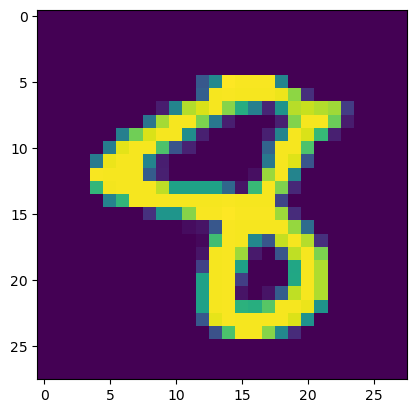

In [30]:
plt.imshow( images[0].reshape(28,28) )
print(images[0].shape)
print(labels[0])

In [31]:
train_data = datasets.CIFAR10(
    root="data",
    train=True,
    download=True,
    transform=transforms.ToTensor(),
)
test_data = datasets.CIFAR10(
    root="data",
    train=False,
    download=True,
    transform=transforms.ToTensor(),
)


Files already downloaded and verified
Files already downloaded and verified


In [32]:
train_loader = DataLoader( train_data, batch_size=128, shuffle=True )
test_loader = DataLoader( test_data, batch_size=128, shuffle=False )

In [33]:
images, labels = next(iter(train_loader))
print(images.shape)
print(labels.shape)

torch.Size([128, 3, 32, 32])
torch.Size([128])


torch.Size([3, 32, 32])
tensor(5)


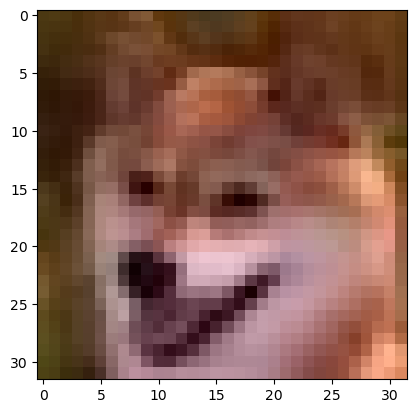

In [34]:
plt.imshow( np.transpose(images[1].numpy(), (1,2,0)) )
print(images[1].shape)
print(labels[1])

# Custom Data Loader

In [35]:
from torch.utils.data import Dataset, DataLoader
import torch
import pandas as pd

In [36]:
class my_dataset( Dataset ) :
    def __init__(self, data, labels) :
        self.data = data
        self.labels = labels

    def __len__(self) :
        return len(self.labels)

    def __getitem__(self, idx) :
        data = self.data[idx]
        label = self.labels[idx]
        sample = {"data" : data, "class" : label}
        return sample

In [37]:
data = ["11", "22", "33", "44", "55", "66"]
labels = [1,2,3,2,1,1]

dtfram = pd.DataFrame({"Data" : data, "Labels" : labels})
data = my_dataset( dtfram["Data"], dtfram["Labels"] )

In [38]:
print( next(iter( data ) ) )
print("# of data : ", len(data) )
print("full # of data : ", list( DataLoader(data)) )

{'data': '11', 'class': 1}
# of data :  6
full # of data :  [{'data': ['11'], 'class': tensor([1])}, {'data': ['22'], 'class': tensor([2])}, {'data': ['33'], 'class': tensor([3])}, {'data': ['44'], 'class': tensor([2])}, {'data': ['55'], 'class': tensor([1])}, {'data': ['66'], 'class': tensor([1])}]
